### Seaborn 라이브러리 - 고급 그래프 도구

##### 데이터셋 가져오기

In [1]:
# 4.25_seaborn_dataset.py

# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# titanic 데이터셋 살펴보기
print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

##### 회귀선이 있는 산점도

- regplot() 함수는 서로 다른 2개의 연속 변수 사이의 산점도를 그리고 선형회귀분석에 의한 회귀선을 함께 나타냄
- fit_reg = False 옵션을 설정하면 회귀선을 안 보이게 할 수 있음

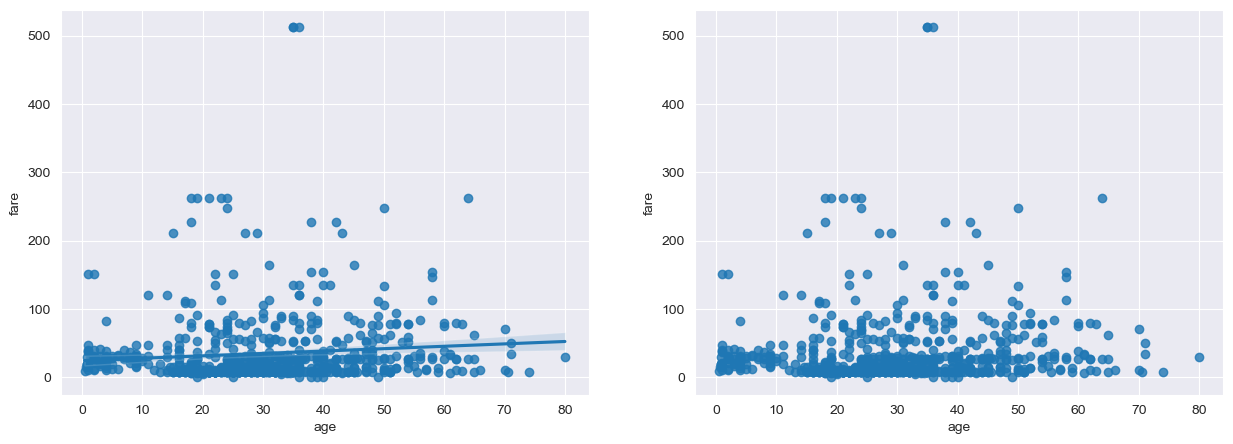

In [2]:
# 4.26_seaborn_relplot.py

# 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn 제공 데이터셋 불러오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성(figure에 2개의 서브플롯 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 그래프 그리기 - 선형회귀선 표시(fit_reg = True)
sns.regplot(x='age', # x축
            y='fare', # y축
            data=titanic, # 데이터셋
            ax=ax1) #axe 객체 - 1번째 그래프

# 그래프 그리기 - 선형회귀선 미표시(fit_reg = False)
sns.regplot(x='age', # x축
            y='fare', # y축
            data=titanic, # 데이터셋
            fit_reg=False, # 선형회귀선 미표시
            ax=ax2) # axe 객체 - 2번째 그래프

plt.show()

##### 히스토그램 / 커널 밀도 그래프

- 단변수(하나의 변수) 데이터의 분포를 확인할 때 distplot() 함수를 이용
- 기본값으로 히스토그램과 커널 밀도 함수를 그래프로 출력
- hist = False 옵션을 추가하면 히스토그램 표시 x
- kde = False 옵션을 전달하면 커널 밀도 그래프 표시 x

/var/folders/t0/85xt099562dflgf6nvxdqgl00000gn/T/ipykernel_21460/1079128591.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'], ax = ax1)


Text(0.5, 1.0, 'titanic fare - hist')

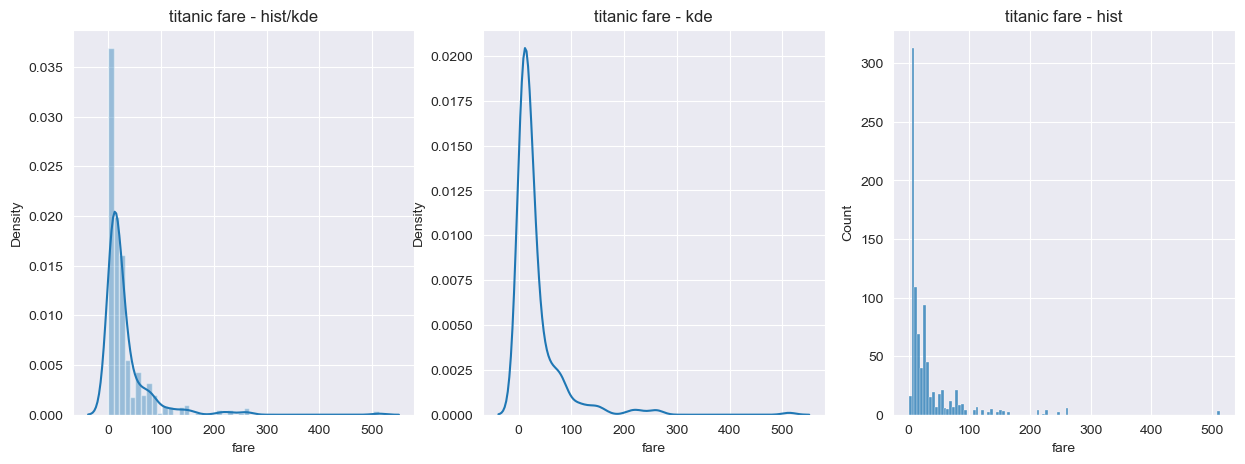

In [4]:
# 4.27_seaborn_distplot.py

# 생략 (4.26과 동일)

# 그래프 객체 생성(figure에 3개의 서브 플롯 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# distplot
sns.distplot(titanic['fare'], ax = ax1)

# kdeplot
sns.kdeplot(x = 'fare', data = titanic, ax = ax2)

# histplot
sns.histplot(x = 'fare', data = titanic, ax = ax3)

# 차트 제목 표시
ax1.set_title('titanic fare - hist/kde')
ax2.set_title('titanic fare - kde')
ax3.set_title('titanic fare - hist')

##### 히트맵

- Seaborn 라이브러리에는 히트맵(heatmap)을 그리는 heatmap() 메서드를 제공
- 2개의 범주형 변수를 각각 x, y축에 놓고 데이터를 매트릭스 형태로 분류

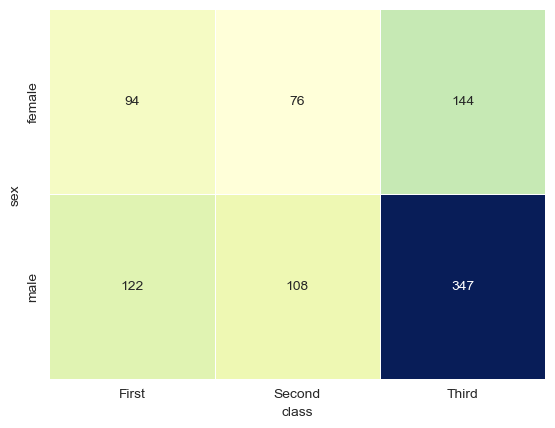

In [7]:
# 4.28_seaborn_heatmap.py

# 생략 (4.27과 동일)

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index = ['sex'], columns = ['class'], aggfunc = 'size')

# 히트맵 그리기
sns.heatmap(table,  # 데이터프레임
            annot = True, fmt = 'd',  # 데이터 값 표시 여부, 정수형 포맷
            cmap = 'YlGnBu',  # 컬러맵
            linewidths = 0.5,  # 구분 선
            cbar = False)  # 컬러바 표시 여부

plt.show()

##### 범주형 데이터의 산점도

- swarplot() 함수는 데이터의 분산까지 고려하여, 데이터 포인트가 서로 중복되지 않도록 그림
- 데이터가 퍼져있는 정도를 입체적으로 볼 수 있음

/Users/youju/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


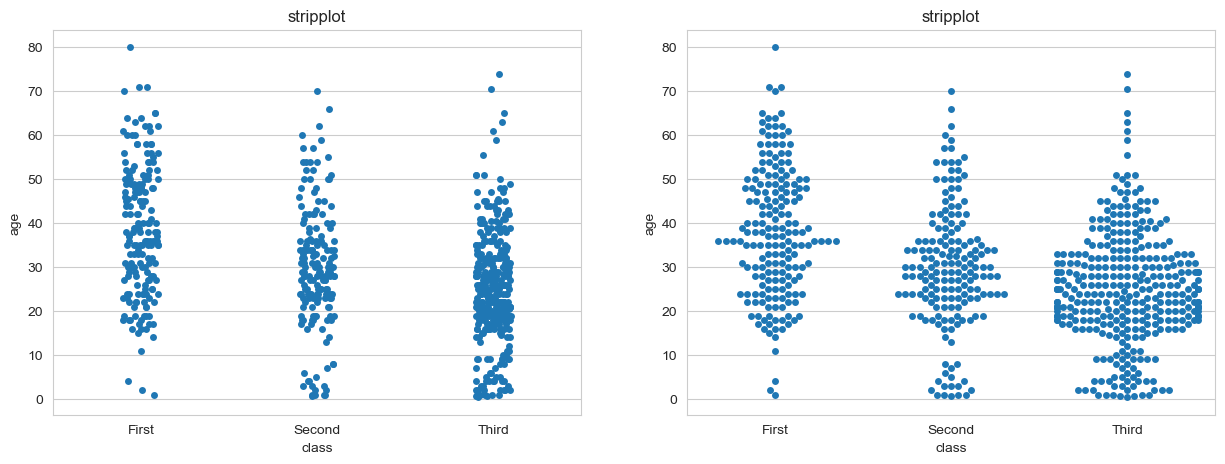

In [8]:
# 4.29_seaborn_scatter.py

# 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn 제공 데이터셋 불러오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성(figure에 2개의 서브플롯 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 이산형 변수의 분포 - 데이터 분산 미고려(중복 표시 o)
sns.stripplot(x = 'class',  # x축
              y = 'age',  # y축
              data = titanic,  # 데이터셋
              ax = ax1)  # axe 객체 - 1번째 그래프

# 이산형 변수의 분포 - 데이터 분산 고려(중복 표시 x)
sns.swarmplot(x = 'class',  # x축
              y = 'age',  # y축
              data = titanic,  # 데이터셋
              ax = ax2)  # axe 객체 - 2번째 그래프

# 차트 제목 표시
ax1.set_title('stripplot')
ax2.set_title('stripplot')

plt.show()

##### 막대 그래프

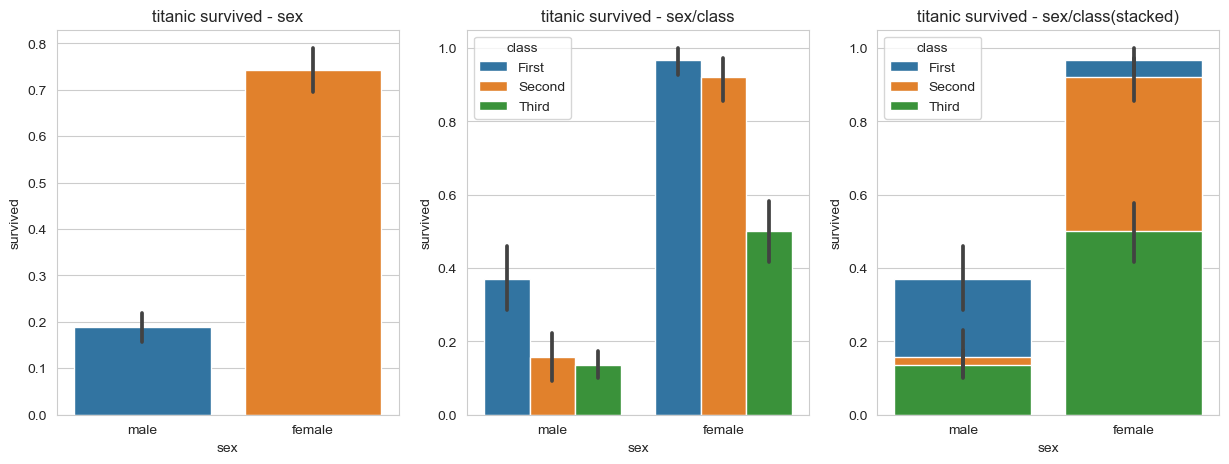

In [10]:
# 4.30_seaborn_bar.py

# 생략 (4.29와 동일)

# 그래프 객체 생성(figure에 3개의 서브플롯 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# x축, y축에 변수 할당
sns.barplot(x = 'sex', y = 'survived', data = titanic, ax = ax1)

# x축, y축에 변수 할당하고 hue 옵션 추가
sns.barplot(x = 'sex', y = 'survived', hue = 'class', data = titanic, ax = ax2)

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x = 'sex', y = 'survived', hue = 'class', dodge = False, data = titanic, ax = ax3)

# 차트에 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

##### 빈도 그래프

- countplot()은 각 범주에 속하는 데이터의 개수를 막대 그래프로 나타냄
- 그래프 색 구성을 다르게 하려면 palette 옵션을 변경하여 적용

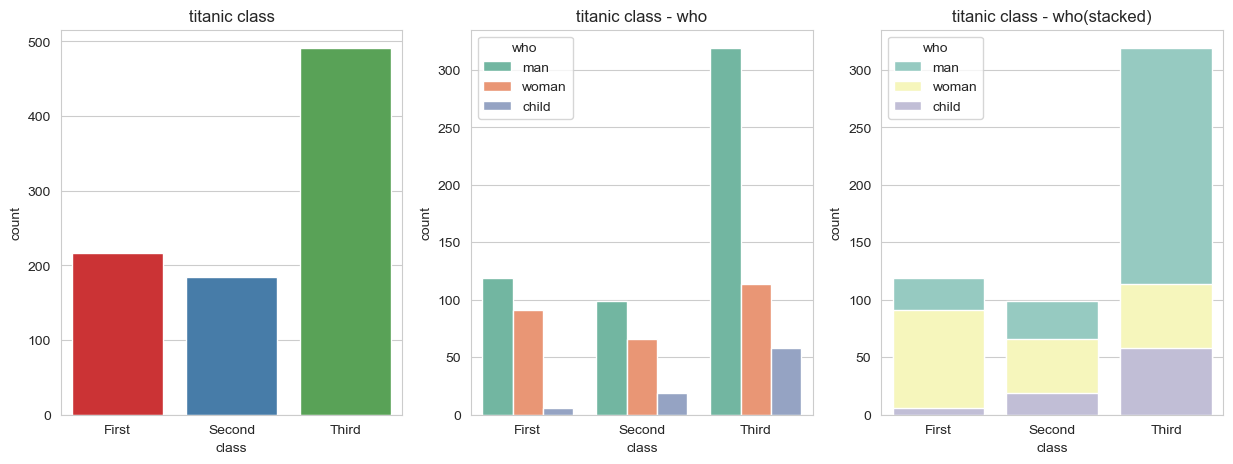

In [17]:
# 4.31_seaborn_count.py

# 생략 (4.30과 동일)

# 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn 제공 데이터셋 불러오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성(figure에 3개의 서브 플롯 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 기본값
sns.countplot(x = 'class', palette = 'Set1', data = titanic, ax = ax1)

# hue 옵션에 'who' 추가
sns.countplot(x = 'class', hue = 'who', palette = 'Set2', data = titanic, ax = ax2)

# dodge = False 옵션 추가(축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x = 'class', hue = 'who', palette = 'Set3', dodge = False, data = titanic, ax = ax3)

# 차트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

##### 박스 플롯 / 바이올린 그래프

- 박스 플롯은 범주형 데이터 분포와 주요 통계 지표를 함께 제공
- 박스 플롯만으로는 데이터가 퍼져 있는 분산의 정도를 정확하게는 알기 어렵기 때문에 커널 밀도 함수 그래프를 y축 방향에 추가하여 바이올린 그래프를 그리는 경우도 있음

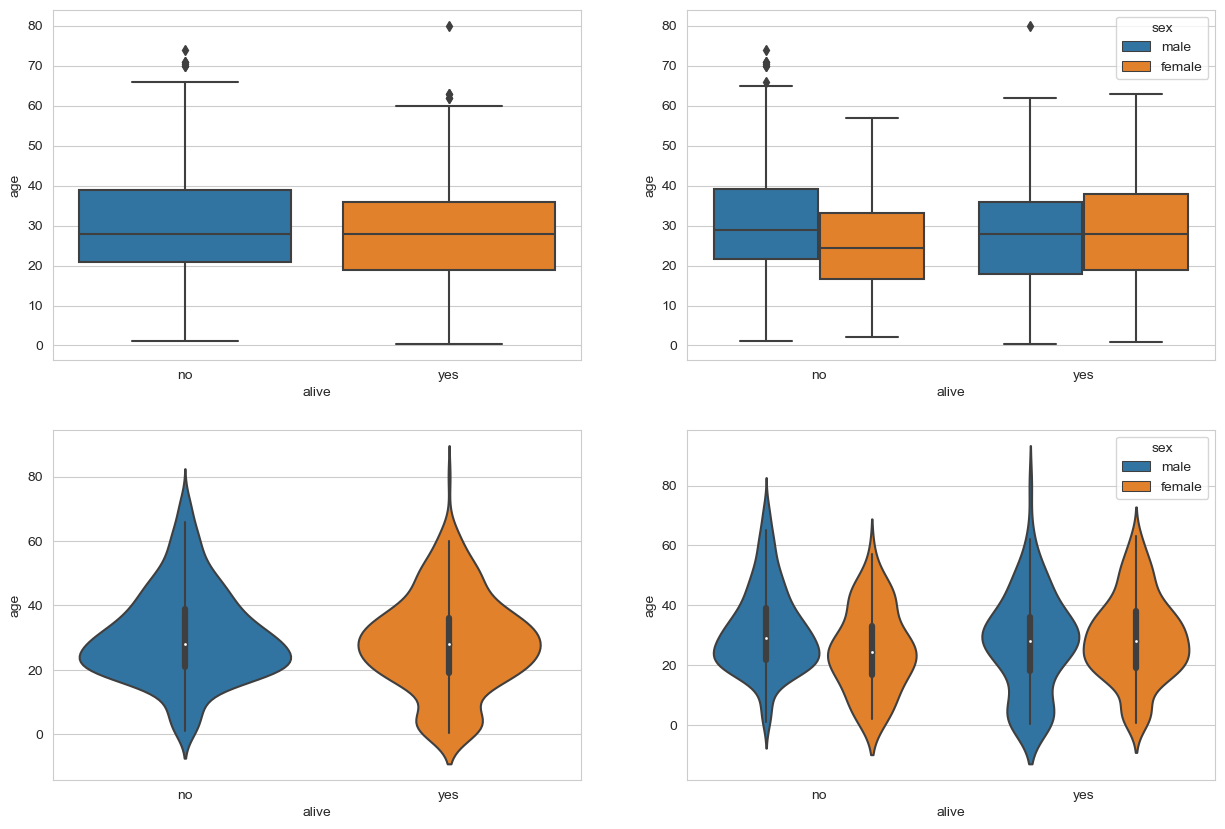

In [18]:
# 4.32_seaborn_box_violin.py

# 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn 제공 데이터셋 불러오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성(figure에 4개의 서브 플롯 생성)
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# 박스 플롯 - 기본값
sns.boxplot(x = 'alive', y = 'age', data = titanic, ax = ax1)

# 바이올린 그래프 - hue 변수 추가
sns.boxplot(x = 'alive', y = 'age', hue = 'sex', data = titanic, ax = ax2)

# 박스 플롯 기본값
sns.violinplot(x = 'alive', y = 'age', data = titanic, ax = ax3)

# 바이올린 그래프 - hue 변수 추가
sns.violinplot(x = 'alive', y = 'age', hue = 'sex', data = titanic, ax = ax4)

plt.show()

##### 조인트 그래프

- jointplot() 함수는 산점도를 기본으로 표시하고, x-y축에 각 변수에 대한 히스토그램을 동시에 보여줌
- 두 변수의 관계와 데이터가 분산되어 있는 정도를 한눈에 파악하기 좋음

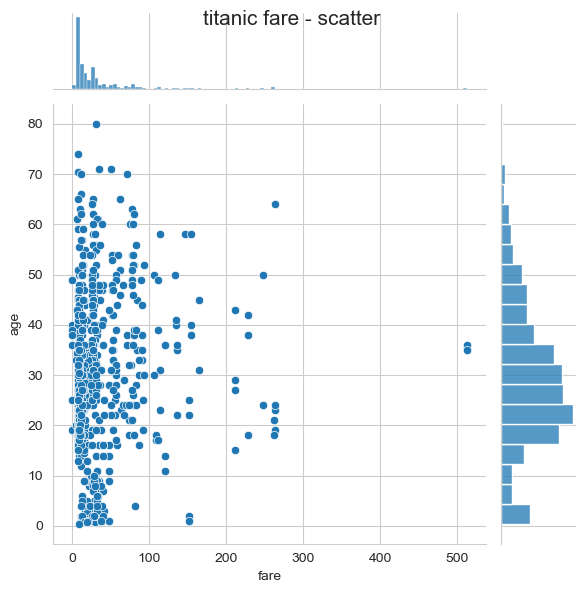

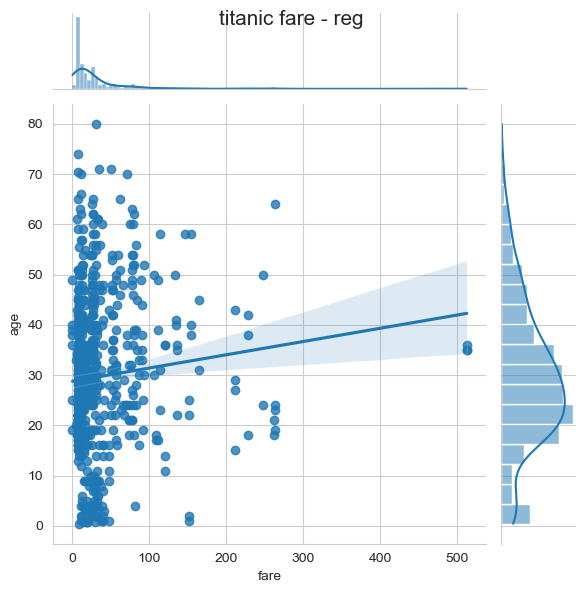

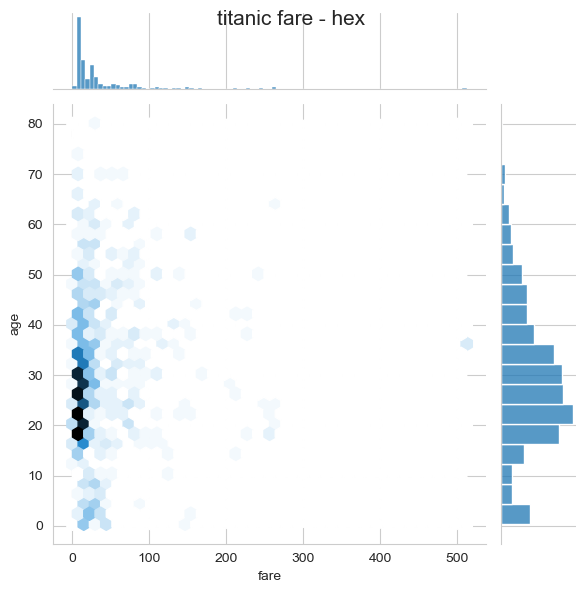

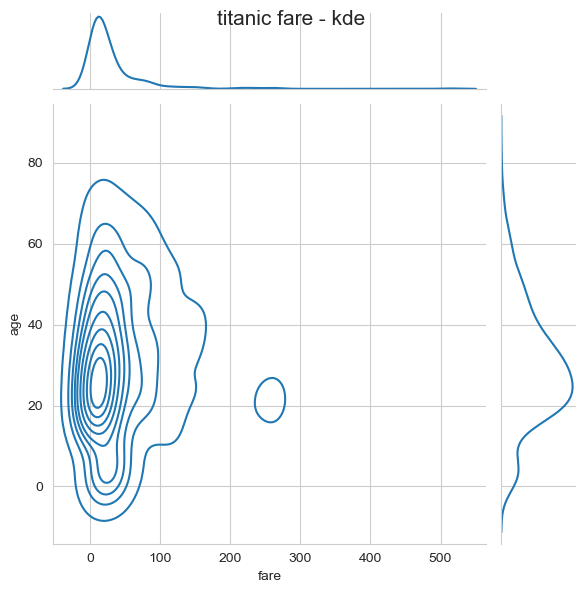

In [19]:
# 4.33_seaborn_joint.py

# 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn 제공 데이터셋 불러오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x = 'fare', y = 'age', data = titanic)

# 조인트 그래프 - 회귀선
j2 = sns.jointplot(x = 'fare', y = 'age', kind = 'reg', data = titanic)

# 조인트 그래프 - 육각 그래프
j3 = sns.jointplot(x = 'fare', y = 'age', kind = 'hex', data = titanic)

# 조인트 그래프 - 커널 밀집 그래프
j4 = sns.jointplot(x = 'fare', y = 'age', kind = 'kde', data = titanic)

# 차트 제목 표시
j1.fig.suptitle('titanic fare - scatter', size = 15)
j2.fig.suptitle('titanic fare - reg', size = 15)
j3.fig.suptitle('titanic fare - hex', size = 15)
j4.fig.suptitle('titanic fare - kde', size = 15)

plt.show()

##### 조건을 적용하여 화면을 그리드로 분할하기

- FacetGrid() 함수는 행, 열 방향으로 서로 다른 조건을 적용하여 여러 개의 서브 플롯을 만들고, 각 서브플롯에 적용할 그래프 종류를 map() 메서드를 이용하여 그래프 객체에 전달함

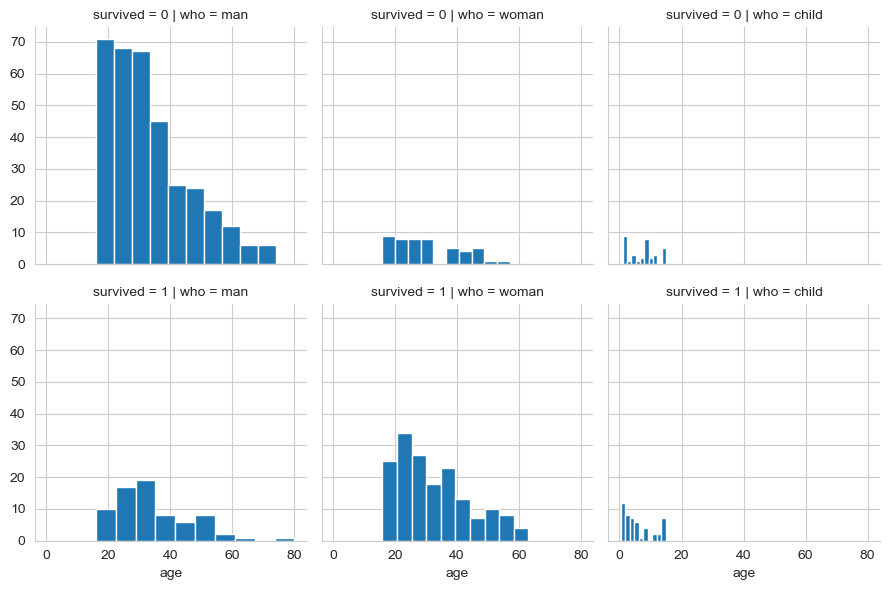

In [20]:
# 4.34_seaborn_facetgrid.py

# 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn 제공 데이터셋 불러오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 조건에 따라 그리드 나누기
g = sns.FacetGrid(data = titanic, col = 'who', row = 'survived')

# 그래프 적용하기
g = g.map(plt.hist, 'age')

##### 이변수 데이터의 분포

- pairplot() 함수는 인자로 전달되는 데이터프레임의 열(변수)을 두 개씩 짝을 지을 수 있는 모든 조합에 대해 표현함
- 그래프를 그리기 위해 만들어진 짝의 개수만큼 화면을 그리드로 나눔

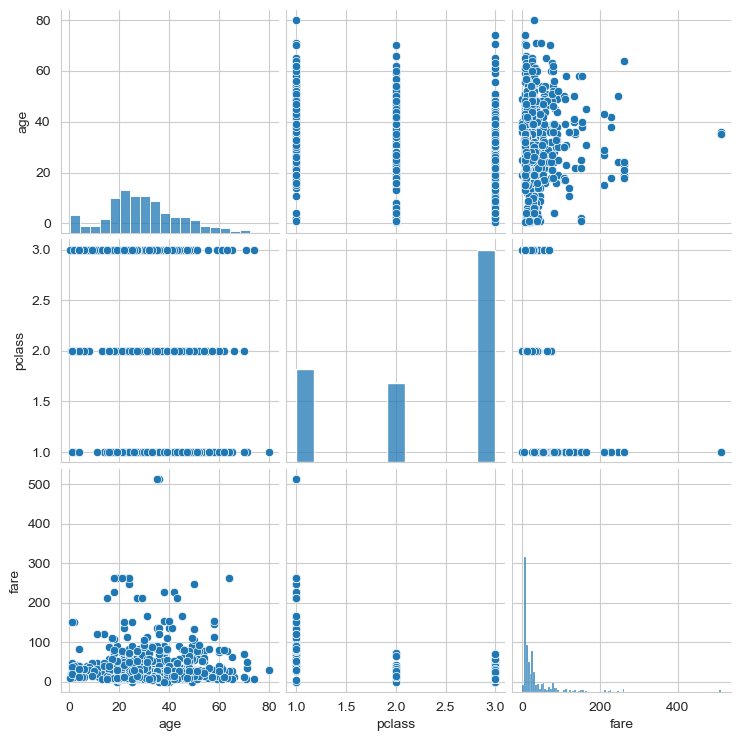

In [21]:
# 4.35_seaborn_pairplot.py

# 생략 (예제 4.34와 동일)

# titanic 데이터셋 중에서 분석 데이터 선택하기
titanic_pair = titanic[['age', 'pclass', 'fare']]

# 조건에 따라 그리드 나누기
g = sns.pairplot(titanic_pair)